Télécharger cet IPython-Notebook : [Exemple_Porta.ipynb](Exemple_Porta.ipynb)
<p style="text-align:center;font-size:200%">Exemple du chiffre de Porta</p>
****

http://www.bibmath.net/forums/viewtopic.php?id=13022

### Le cryptogramme

In [1]:
k = 'OYZXWNTNDTGPNFIN\
BYSQKDUEDOYPWEZIDXHB\
BPVLCFAZQYPNEMPQRPDU\
QCWTWEIRCHAUAWZYBD\
PLOYIEUUAGLJZLHPLOSWUN\
BHLCCHXWBZKQBJHIL\
JBQMYGYUFAQBJOQUGWTWH'
k, len(k), len(set(k))

('OYZXWNTNDTGPNFINBYSQKDUEDOYPWEZIDXHBBPVLCFAZQYPNEMPQRPDUQCWTWEIRCHAUAWZYBDPLOYIEUUAGLJZLHPLOSWUNBHLCCHXWBZKQBJHILJBQMYGYUFAQBJOQUGWTWH',
 134,
 26)

La _présence_ est de 26 (les 26 lettres de l'alphabet sont dans le cryptogramme) : on n'est pas en présence d'une substitution simple. On peut le vérifier avec l'histogramme des effectifs des lettres :

In [2]:
import matplotlib.pyplot as plt
def histo(s, alpha = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
    eff = [0]*len(alpha)
    for i in range(0, len(s)):
        if s[i] not in alpha:
            continue
        eff[alpha.index(s[i])] += 1
    plt.bar(range(len(alpha)), eff, width=.5)
    plt.xticks(range(len(alpha)), list(alpha))
    plt.show()

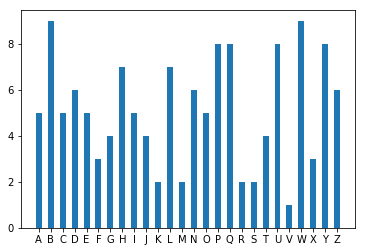

In [3]:
histo(k)

On peut supposer un chiffre polyalphabétique périodique (différents alphabets sont utilisés cycliquement). On cherche la période.

#### Méthode de Kullback

[_Solomon Kullback_](https://fr.wikipedia.org/wiki/Solomon_Kullback) expose sa méthode sur un exemple dans [_Statistical Methods In Cryptanalysis p.41-47_](https://archive.org/details/41760349079953/page/n49/mode/2up).

Pour tester une période de longueur $p$, on écrit le cryptogramme en ligne de $p$ caractères. Si $p$ est égal à la période alors chaque colonne est chiffrée avec le même alphabet et l'indice de coïncidence est proche de $0.07$ (distribution monoalphabétique). Si au contraire $p$ n'est pas égal à la période, chaque colonne est constituée de caractères chiffrés avec des alphabets différents et l'indice de coïncidence est proche de $0.035$ (distribution aléatoire des lettres).

Pour lisser les écarts aléatoires, on fait la moyenne des indices de coïncidence des colonnes :

In [4]:
def IndexC(s):
    """ Retourne l'indice de coïncidence de la chaîne s.
    """
    h = {}
    for c in s:
        if c in h:
            h[c] += 1
        else:
            h[c] = 1
    n = 0
    ic = 0
    for c in h:
        ic += h[c]*(h[c]-1)
        n += h[c]
    return ic/n/(n-1)

def Kullback(crypto, nmax = 20):
    """Recherche longueur de la clé en utilisant l'IC (méthode de S. Kullback
       nmax = longueur maxi de la clé
    """
    print('  n : ic moyen  \t[ ic min  : ic max  ] écart-type')
    for n in range(1, nmax+1):
        c = {}
        for i in range(len(crypto)):
            if i%n in c:
                c[i%n] += crypto[i]
            else:
                c[i%n] = crypto[i]
        ic = 0
        var = 0
        ic_min = float('inf')
        ic_max = 0.0
        for i in c:
            ici = IndexC(c[i])
            ic += ici
            var += ici**2
            if ici < ic_min:
                ic_min = ici
            if ici > ic_max:
                ic_max = ici
        ic = ic/n
        var = var/n - ic**2
        print(format(n, '3d'), ':', format(ic, '.10f'), '\t[', format(ic_min, '.5f'), ':',
        format(ic_max, '.5f'), ']', format(var**0.5, '.5f'))


In [5]:
Kullback(k)

  n : ic moyen  	[ ic min  : ic max  ] écart-type
  1 : 0.0391650769 	[ 0.03917 : 0.03917 ] 0.00000
  2 : 0.0443238354 	[ 0.04342 : 0.04523 ] 0.00090
  3 : 0.0403257380 	[ 0.03838 : 0.04242 ] 0.00165
  4 : 0.0562889929 	[ 0.04356 : 0.06952 ] 0.00920
  5 : 0.0369686610 	[ 0.03134 : 0.04274 ] 0.00408
  6 : 0.0475563084 	[ 0.03030 : 0.06926 ] 0.01468
  7 : 0.0419381788 	[ 0.02924 : 0.06433 ] 0.01305
  8 : 0.0691789216 	[ 0.02206 : 0.09559 ] 0.02132
  9 : 0.0526658527 	[ 0.02857 : 0.09524 ] 0.02155
 10 : 0.0401098901 	[ 0.01282 : 0.07692 ] 0.01769
 11 : 0.0278660733 	[ 0.00000 : 0.06061 ] 0.02048
 12 : 0.0611111111 	[ 0.01818 : 0.10606 ] 0.02270
 13 : 0.0503496503 	[ 0.00000 : 0.13333 ] 0.04094
 14 : 0.0515873016 	[ 0.00000 : 0.13333 ] 0.03395
 15 : 0.0338624339 	[ 0.00000 : 0.11111 ] 0.02718
 16 : 0.0659722222 	[ 0.02778 : 0.14286 ] 0.03134
 17 : 0.0294117647 	[ 0.00000 : 0.07143 ] 0.02803
 18 : 0.0608465608 	[ 0.00000 : 0.14286 ] 0.04122
 19 : 0.0269423559 	[ 0.00000 : 0.09524 ] 0.03181


Le premier maximum marqué est $8$ : on peut supposer que la clé est de longueur $8$.

#### Méthode de Kasiski

Le major [_Friedrich Kasiski_](https://fr.wikipedia.org/wiki/Friedrich_Kasiski) a exposé sa méthode dans son traité de cryptographie [_Die Geheimschriften und die Dechiffrir-Kunst_](https://books.google.fr/books?id=fB5dAAAAcAAJ&hl=fr&pg=PP7#v=onepage&q&f=false) (faut déchiffrer !)

La méthode de Kasiski est basée sur les répétitions de séquences de lettres : si une même séquence de lettres dans le clair donne une même séquence de lettres dans le crypto alors l'écart entre les séquences est un multiple de la longueur de la clé. On cherche les répétitions de séquence de lettres dans le cryptogramme et on détermine les diviseurs des écarts. Il peut naturellement y avoir des répétitions dues au hasard, mais la plupart doivent correspondre à des répétitions dans le clair.

In [6]:
def repetitions(crypto, size):
    rep = {}
    for i in range(len(crypto)-size):
        block = crypto[i:i+size]
        if block in rep:
            continue
        rep[block] = [i]
        j = i+1
        nexti = crypto.find(block, j)
        while nexti != -1:
            if nexti not in rep[block]:
                rep[block].append(nexti)
            j += 1
            nexti = crypto.find(block, j)
        nrep = {}
        for key in rep:
            if len(rep[key]) != 1:
                nrep[key] = rep[key]
    return nrep

def diviseurs(n):
    return [x for x in range(1, n+1) if n%x == 0]

def Kasiski(k):
    size = 8
    r = repetitions(k, size)
    while r != {}:
        size += 1
        r = repetitions(k, size)
    while r == {} and size > 1:
        size -= 1
        r = repetitions(k, size)
    eff = {}
    while size != 1:
        for s in r:
            print(s, ':', r[s])
        for s in r:
            for i in range(len(r[s])):
                for j in range(i+1, len(r[s])):
                    ediv = diviseurs(r[s][j] - r[s][i])
                    for d in ediv:
                        if d in eff:
                            eff[d] += 1
                        else:
                            eff[d] = 1
        size -= 1
        r = repetitions(k, size)
    sorted_items = sorted(eff.items(), key=lambda x: x[1], reverse=True)
    if sorted_items == []:
        print('Pas de répétition')
    else:
        print('diviseur\teffectif')
        for item in sorted_items:
            if item[0] == 1:
                continue
            print(item[0], '\t:\t', item[1])

In [7]:
Kasiski(k)

WTW : [58, 130]
PLO : [74, 89]
QBJ : [107, 123]
OY : [0, 25, 76]
XW : [3, 102]
PN : [11, 46]
NB : [15, 95]
DU : [21, 54]
YP : [26, 45]
WE : [28, 60]
LC : [39, 98]
FA : [41, 121]
WT : [58, 130]
TW : [59, 131]
CH : [64, 100]
UA : [67, 81]
PL : [74, 89]
LO : [75, 90]
LJ : [84, 112]
QB : [107, 123]
BJ : [108, 124]
diviseur	effectif
2 	:	 13
4 	:	 12
3 	:	 10
8 	:	 9
5 	:	 7
16 	:	 6
9 	:	 5
6 	:	 4
12 	:	 4
18 	:	 4
36 	:	 4
24 	:	 3
72 	:	 3
15 	:	 3
7 	:	 3
19 	:	 2
11 	:	 2
33 	:	 2
10 	:	 2
20 	:	 2
40 	:	 2
80 	:	 2
14 	:	 2
25 	:	 1
38 	:	 1
76 	:	 1
17 	:	 1
51 	:	 1
99 	:	 1
35 	:	 1
32 	:	 1
59 	:	 1
28 	:	 1


On voit que la période $8$ est plausible (beaucoup de diviseurs pour $2$, $4$ et $8$).

### Le chiffre de Porta

Quand on a la longueur de la clé, on teste les chiffres de Vigenère, de Beaufort, variante à l'allemande, et, en dernier ressort, le chiffre de Porta. Ici, on teste le chiffre de Porta.

In [8]:
alpha26 = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'  # alphabet standard (variable globale)

Le système de Porta utilise 13 alphabets réciproques de 26 lettres, chaque alphabet étant repéré par deux lettres.  
(Le système original de Porta utilise [11 alphabets de 22 lettres](https://books.google.de/books?id=sc-Zaq8_jFIC&hl=fr&pg=PA101#v=onepage&q&f=false).)

In [9]:
def alpha_réciproque(p1, p2):
    """Retourne l'alphabet réciproque défini par les deux parties p1 et p2"""
    assert(len(p1) == 13)
    assert(len(p2) == 13)
    assert(len(set(p1) | set(p2)) == 26)
    h = {}
    for i in range(13):
        h[p1[i]] = p2[i]
        h[p2[i]] = p1[i]
    return ''.join([h[c] for c in alpha26])

Les alphabets de Porta :

In [10]:
alphaP = [
    alpha_réciproque('ABCDEFGHIJKLM','NOPQRSTUVWXYZ'), #  0 AB
    alpha_réciproque('ABCDEFGHIJKLM','ZNOPQRSTUVWXY'), #  1 CD
    alpha_réciproque('ABCDEFGHIJKLM','YZNOPQRSTUVWX'), #  2 EF
    alpha_réciproque('ABCDEFGHIJKLM','XYZNOPQRSTUVW'), #  3 GH
    alpha_réciproque('ABCDEFGHIJKLM','WXYZNOPQRSTUV'), #  4 IJ
    alpha_réciproque('ABCDEFGHIJKLM','VWXYZNOPQRSTU'), #  5 KL
    alpha_réciproque('ABCDEFGHIJKLM','UVWXYZNOPQRST'), #  6 MN
    alpha_réciproque('ABCDEFGHIJKLM','TUVWXYZNOPQRS'), #  7 OP
    alpha_réciproque('ABCDEFGHIJKLM','STUVWXYZNOPQR'), #  8 QR
    alpha_réciproque('ABCDEFGHIJKLM','RSTUVWXYZNOPQ'), #  9 ST
    alpha_réciproque('ABCDEFGHIJKLM','QRSTUVWXYZNOP'), # 10 UV
    alpha_réciproque('ABCDEFGHIJKLM','PQRSTUVWXYZNO'), # 11 WX
    alpha_réciproque('ABCDEFGHIJKLM','OPQRSTUVWXYZN'), # 12 YZ
]

In [11]:
alphaP

['NOPQRSTUVWXYZABCDEFGHIJKLM',
 'ZNOPQRSTUVWXYBCDEFGHIJKLMA',
 'YZNOPQRSTUVWXCDEFGHIJKLMAB',
 'XYZNOPQRSTUVWDEFGHIJKLMABC',
 'WXYZNOPQRSTUVEFGHIJKLMABCD',
 'VWXYZNOPQRSTUFGHIJKLMABCDE',
 'UVWXYZNOPQRSTGHIJKLMABCDEF',
 'TUVWXYZNOPQRSHIJKLMABCDEFG',
 'STUVWXYZNOPQRIJKLMABCDEFGH',
 'RSTUVWXYZNOPQJKLMABCDEFGHI',
 'QRSTUVWXYZNOPKLMABCDEFGHIJ',
 'PQRSTUVWXYZNOLMABCDEFGHIJK',
 'OPQRSTUVWXYZNMABCDEFGHIJKL']

La fonction suivante assure le chiffrement d'une chaîne de caractères dans le système de Porta. La clé est numérique : chaque alphabet est repéré par son ordre (entre 0 et12).

In [12]:
def C_Porta(crypto, numkey):
    keysize = len(numkey)
    txt = ''
    i = 0
    for c in crypto:      # caractère alphabétique à chiffrer
        if c in alpha26:
            txt += alphaP[numkey[i%keysize]][alpha26.index(c)]
            i += 1
        else:             # caractère non alphabétique non chiffré
            txt += c
    return txt

Comme on préfère souvent une clé littérale, la fonction suivante assure la conversion. On obtient facilement le numéro de l'alphabet correspondant à une lettre en faisant la division entière par 2 du rang de la lettre dans l'alphabet standard.

In [13]:
def str2numkey(s):
    return [alpha26.index(c)//2 for c in s]

In [14]:
str2numkey('HELLO')

[3, 2, 5, 5, 7]

Exemple de chiffrement :

In [15]:
C_Porta('BONJOUR TOUT LE MONDE !', str2numkey('HELLO'))

'YDFRIKG LGBJ WZ UIDOZ !'

Comme tous les alphabets du système sont réciproques, la même fonction sert à déchiffrer :

In [16]:
C_Porta('YDFRIKG LGBJ WZ UIDOZ !', str2numkey('HELLO'))

'BONJOUR TOUT LE MONDE !'

### Attaque par force brute

On utilise une fonction de score basée sur les fréquences des quadrigrammes du français.  
Pour les détails, voir le début de [substitution_mono](http://bribes.org/crypto/substitution_mono.html).

In [17]:
f4g ={}    # dic des fréquences des 4-grammes
f = open('brut4g_fr.txt')
total = 0  # effectif total
for line in f:
    (w, c) = line.split(sep= ' ')
    f4g[w] = int(c)
    total += int(c)
for w in f4g:
    f4g[w] /= total  # calcul des fréquences
f.close()

In [18]:
from math import log10
def logscore(s):
    logsum = 0
    min_freq = 1e-100          # fréquence d'un 4gramme inexistant
    for i in range(len(s)-3):
        logsum += log10(f4g.get(s[i:i+4], min_freq))
    return -logsum

La fonction suivante détermine les quatre meilleurs alphabets de la clé numérique à partir de la position `pos` (on cherche à obtenir le score minimum).


In [19]:
def _test4_Porta(crypto, numkey, pos=0):
    size = len(numkey)
    best_score = float('inf')
    best_key = []
    for numkey[pos%size] in range(13):
        for numkey[(pos+1)%size] in range(13):
            for numkey[(pos+2)%size] in range(13):
                for numkey[(pos+3)%size] in range(13):
                    txt = C_Porta(crypto, numkey)
                    score = logscore(txt)
                    if score < best_score:
                        best_score = score
                        best_key = list(numkey)
    return [best_score, best_key]

La fonction suivante part de la clé [0, 0, 0, 0, ..., 0] et détermine progressivement la meilleure clé en se déplaçant d'un cran vers la droite à chaque itération (on pourrait aller plus vite).

In [20]:
def FB_Porta(crypto, p):
    assert(p >= 4)
    numkey = [0] * p
    for i in range(p):
        [score, numkey] = _test4_Porta(crypto, numkey, i)
        print(score, numkey)  # trace
    print('score = ', score)
    print('numkey = ', numkey)
    print(C_Porta(crypto, numkey))

In [21]:
FB_Porta(k, 8)

6735.769420725279 [10, 2, 6, 1, 0, 0, 0, 0]
5186.941456739997 [10, 2, 6, 1, 8, 0, 0, 0]
4341.348285239743 [10, 2, 6, 1, 8, 4, 0, 0]
1922.6618394555662 [10, 2, 6, 1, 8, 2, 1, 0]
535.2299865235302 [10, 2, 6, 1, 8, 2, 1, 4]
535.2299865235302 [10, 2, 6, 1, 8, 2, 1, 4]
535.2299865235302 [10, 2, 6, 1, 8, 2, 1, 4]
535.2299865235302 [10, 2, 6, 1, 8, 2, 1, 4]
score =  535.2299865235302
numkey =  [10, 2, 6, 1, 8, 2, 1, 4]
LAFLECHETINDIQUERALEPOINTDEDEPARTMONTEJUSQUALADEUXIEMEPLANCHEPUISSUISLACROIXJAUNEJUSQUAUXESCALIERSSOUSLARBRETUTROUVERASCEQUETUCHERCHES


LA FLECHE T INDIQUERA LE POINT DE DEPART MONTE JUSQU A LA DEUXIEME PLANCHE PUIS SUIS LA CROIX JAUNE JUSQU AUX ESCALIERS SOUS L ARBRE TU TROUVERAS CE QUE TU CHERCHES

À partir de la clé numérique, il n'est pas difficile de trouver la clé littérale :  
```
UEMCQECI
VFNDRFDJ

.E...E.I
V.NDR.D 
```

On peut écrire une petite fonction pour faire ça automatiquement : on évalue le score de toutes les combinaisons (pour une clé de longueur $n$ il y a $2^n$ possibilités). On sélectionne la chaîne de plus faible score.


In [22]:
import itertools
def numkey2str(numkey):
    best_score = float('inf')
    best_key = ''
    for d in itertools.product([0, 1], repeat=len(numkey)):
        key = ''.join([alpha26[2*numkey[i]+d[i]] for i in range(len(numkey))])
        score = logscore(key)
        if score < best_score:
            best_score = score
            best_key = key
    return best_key

In [23]:
numkey2str([10, 2, 6, 1, 8, 2, 1, 4])

'VENDREDI'

****
Le 17/10/2020 - Contact : <A HREF="mailto:Rossignol@bribes.org">Rossignol@bribes.org</A>     